# Plotting

A notebook to plot the data output by the c++ code

In [100]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import animation, cm
from IPython.display import HTML
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D

In [101]:
data = np.loadtxt('out.dat', delimiter=',')

In [102]:
ts = data[:,0]
xs = data[:,1]
ys = data[:,2]
ls = data[:,3]
Ds = data[:,4]
Sxs = data[:,5]
Syx = data[:,6]


In [103]:
dt = 10
nt = int(ts[-1]/dt+1)
t = range(nt)
nlayers = 2
xmax = 10.
ymax = 10.

# assume square
nx = int(np.sqrt(len(ts) / (nlayers*nt)))
ny = int(np.sqrt(len(ts) / (nlayers*nt)))


D_2d = np.zeros((nt, nlayers, nx, ny))
#Sx_2d = np.zeros((nt, nlayers, nx, ny))
#Sy_2d = np.zeros((nt, nlayers, nx, ny))

for i in range(len(ts)):
    #print(int(xs[i]*nx/xmax))
    D_2d[int(ts[i]/dt), int(ls[i]), int(xs[i]), int(ys[i])] = Ds[i]

In [104]:
x = np.linspace(0, xmax, num=nx, endpoint=False)
y = np.linspace(0, ymax, num=ny, endpoint=False)

In [105]:
X, Y = np.meshgrid(x,y)

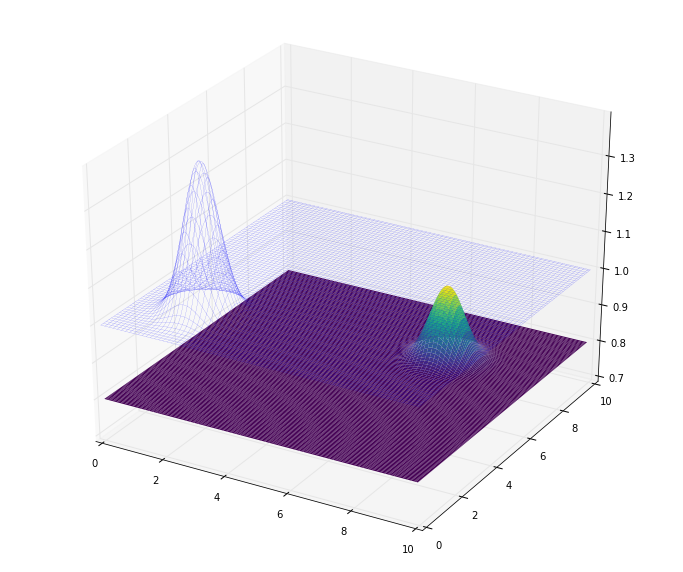

In [106]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')

ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0.7,1.4)

ax.plot_surface(X,Y,D_2d[0,1,:,:], rstride=1, cstride=2, lw=0, cmap=cm.viridis, antialiased=True)

ax.plot_wireframe(X,Y,D_2d[0,0,:,:], rstride=2, cstride=2, lw=0.1, cmap=cm.viridis, antialiased=True)

#plt.plot(x,h[0,1:-1,0],x,h[1,1:-1,0], lw=2)
plt.show()

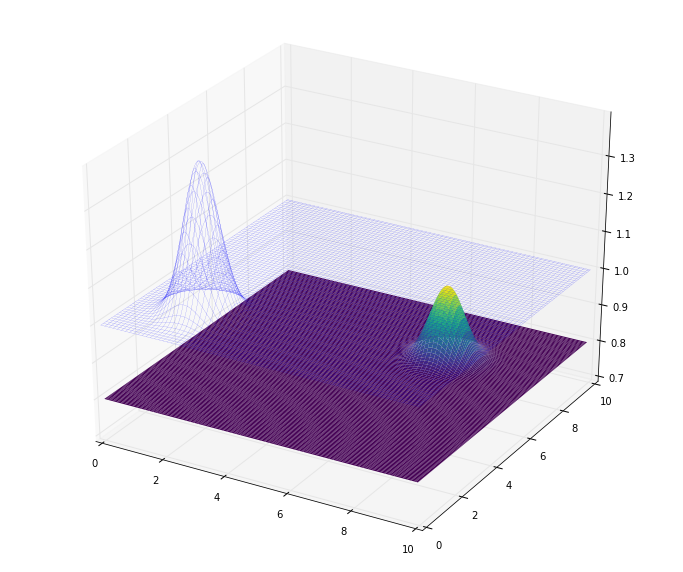

In [107]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
#ax = plt.axes(xlim=(0,10), zlim=(0.7,1.4))
#surface_1 = ax.plot_surface([],[],[], rstride=1, cstride=2, lw=0, cmap=cm.viridis, antialiased=True)[0]

#surface_2 = ax.plot_wireframe([],[],[], rstride=2, cstride=2, lw=0.1, cmap=cm.viridis, antialiased=True)[0]
#line = ax.plot([],[], lw=2)[0]
#line2 = ax.plot([],[], lw=2)[0]

surface_1 = ax.plot_surface(X,Y,D_2d[0,1,:,:], rstride=1, cstride=2, lw=0, cmap=cm.viridis, antialiased=True)
surface_2 = ax.plot_wireframe(X,Y,D_2d[0,0,:,:], rstride=2, cstride=2, lw=0.1, cmap=cm.viridis, antialiased=True)

def animate(i):
    ax.clear()
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.set_zlim(0.7,1.4)
    ax.plot_surface(X,Y,D_2d[i,1,:,:], rstride=1, cstride=2, lw=0, cmap=cm.viridis, antialiased=True)
    ax.plot_wireframe(X,Y,D_2d[i,0,:,:], rstride=2, cstride=2, lw=0.1, cmap=cm.viridis, antialiased=True)

anim = animation.FuncAnimation(fig, animate, frames=60, interval=200)

In [108]:
HTML(anim.to_html5_video())

In [110]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('gr_cuda.mp4', writer=writer)